# Time series Forecasting with Facebook Prophet

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


### Import the data file

In [9]:
avocado_df = pd.read_csv('avocado.csv')

In [10]:
avocado_df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Data Preprocessing

In [12]:
# sort by the date
avocado_df = avocado_df.sort_values("Date")

In [13]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


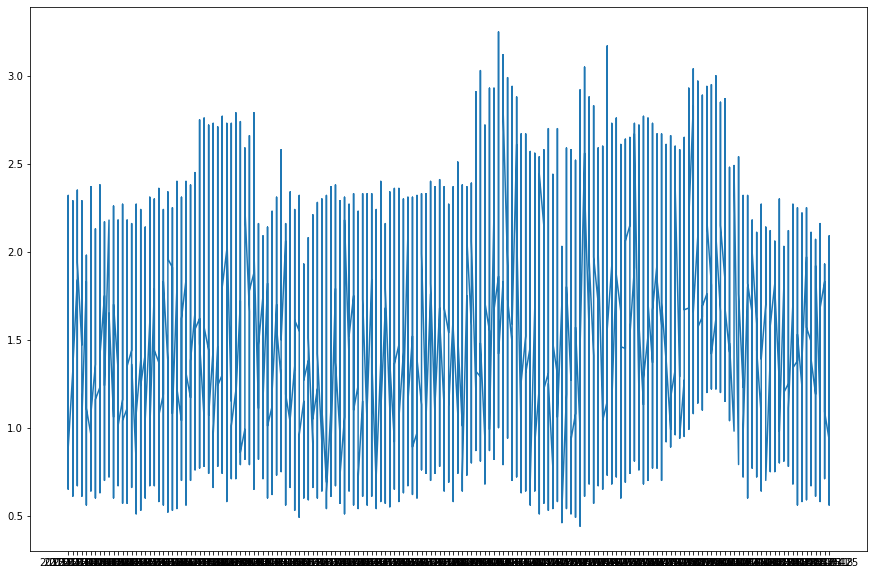

In [16]:
plt.figure(figsize=(15,10))
plt.plot(avocado_df['Date'],avocado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

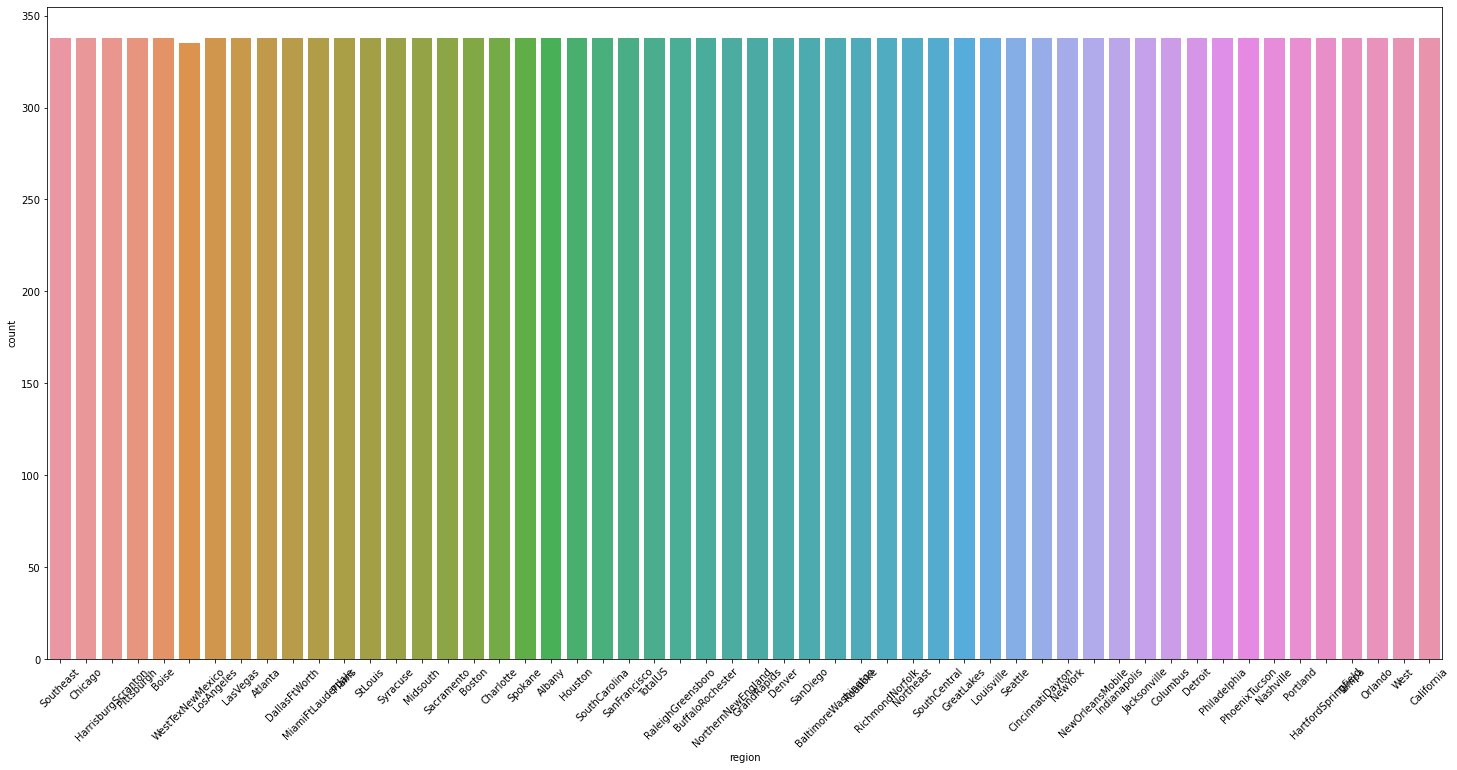

In [21]:
plt.figure(figsize = (25,12))
sns.countplot(x='region',data = avocado_df)
plt.xticks(rotation = 45)

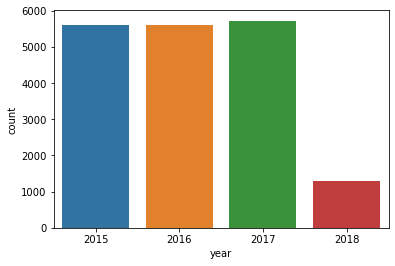

In [22]:
sns.countplot(x='year', data=avocado_df)

In [25]:
avacado_prophet_df=avacado_df[['Date','AveragePrice']]

In [26]:
avacado_prophet_df

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


### Data Preperation for Prophet

In [31]:
avacado_prophet_df = avacado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice': 'y'})

In [32]:
m = Prophet()
m.fit(avacado_prophet_df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [34]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500084,0.890812,1.869083,1.500084,1.500084,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,0.0,0.0,0.0,1.385448
1,2015-01-11,1.494831,0.899178,1.865972,1.494831,1.494831,-0.106332,-0.106332,-0.106332,-0.106332,-0.106332,-0.106332,0.0,0.0,0.0,1.388499
2,2015-01-18,1.489578,0.860969,1.879442,1.489578,1.489578,-0.106074,-0.106074,-0.106074,-0.106074,-0.106074,-0.106074,0.0,0.0,0.0,1.383504
3,2015-01-25,1.484325,0.834210,1.859662,1.484325,1.484325,-0.125065,-0.125065,-0.125065,-0.125065,-0.125065,-0.125065,0.0,0.0,0.0,1.359260
4,2015-02-01,1.479072,0.858131,1.822224,1.479072,1.479072,-0.153456,-0.153456,-0.153456,-0.153456,-0.153456,-0.153456,0.0,0.0,0.0,1.325615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.173476,0.602143,1.608549,1.006511,1.352342,-0.087423,-0.087423,-0.087423,-0.087423,-0.087423,-0.087423,0.0,0.0,0.0,1.086052
530,2019-03-22,1.172768,0.575986,1.573736,1.005529,1.352569,-0.085713,-0.085713,-0.085713,-0.085713,-0.085713,-0.085713,0.0,0.0,0.0,1.087055
531,2019-03-23,1.172061,0.582178,1.614653,1.004573,1.352797,-0.083727,-0.083727,-0.083727,-0.083727,-0.083727,-0.083727,0.0,0.0,0.0,1.088334
532,2019-03-24,1.171354,0.585061,1.625979,1.003617,1.352773,-0.081484,-0.081484,-0.081484,-0.081484,-0.081484,-0.081484,0.0,0.0,0.0,1.089870


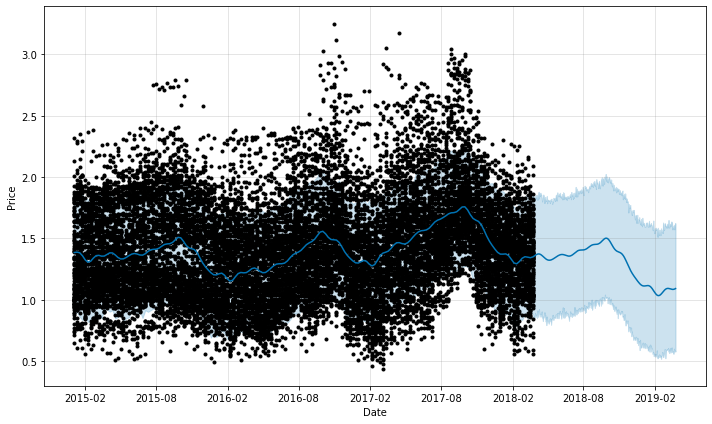

In [35]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

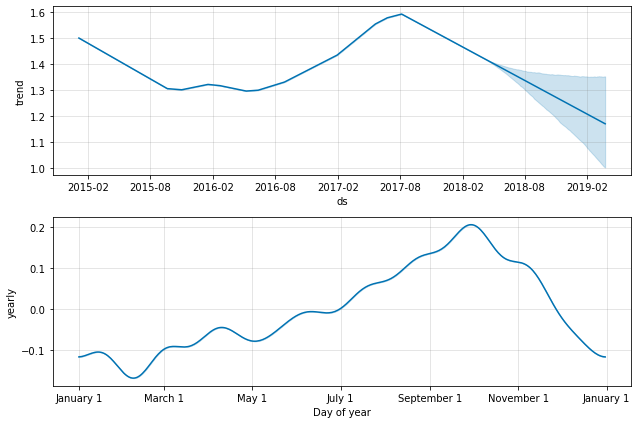

In [36]:
figure3 = m.plot_components(forecast)

### Predict for the East Region


In [51]:
avocado_df['region'].value_counts().iloc[:10]

Spokane             338
West                338
SanFrancisco        338
Albany              338
NewOrleansMobile    338
Boise               338
Columbus            338
PhoenixTucson       338
GrandRapids         338
Midsouth            338
Name: region, dtype: int64

In [52]:
avocado_df_sample = avocado_df[avocado_df['region']=='SanFrancisco']

In [53]:
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2235,51,2015-01-04,0.99,907795.89,179507.69,637000.10,8803.79,82484.31,82033.71,444.44,6.16,conventional,2015,SanFrancisco
11361,51,2015-01-04,1.18,22630.58,13175.57,9028.34,0.00,426.67,426.67,0.00,0.00,organic,2015,SanFrancisco
2234,50,2015-01-11,1.03,916450.76,155455.32,670522.75,4107.26,86365.43,85706.54,658.89,0.00,conventional,2015,SanFrancisco
11360,50,2015-01-11,1.12,29676.78,17907.49,11586.46,0.00,182.83,182.83,0.00,0.00,organic,2015,SanFrancisco
11359,49,2015-01-18,1.27,41482.48,26336.41,14789.40,0.00,356.67,356.67,0.00,0.00,organic,2015,SanFrancisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,2,2018-03-11,2.16,25741.84,10368.17,10850.44,0.00,4523.23,4523.23,0.00,0.00,organic,2018,SanFrancisco
18106,1,2018-03-18,1.86,38845.77,10129.17,10074.10,0.00,18642.50,18639.17,3.33,0.00,organic,2018,SanFrancisco
8983,1,2018-03-18,1.38,777300.99,215279.75,435108.21,2698.44,124214.59,119694.95,92.29,4427.35,conventional,2018,SanFrancisco
8982,0,2018-03-25,1.01,1203274.11,198289.36,895797.12,2202.74,106984.89,103033.73,186.20,3764.96,conventional,2018,SanFrancisco


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


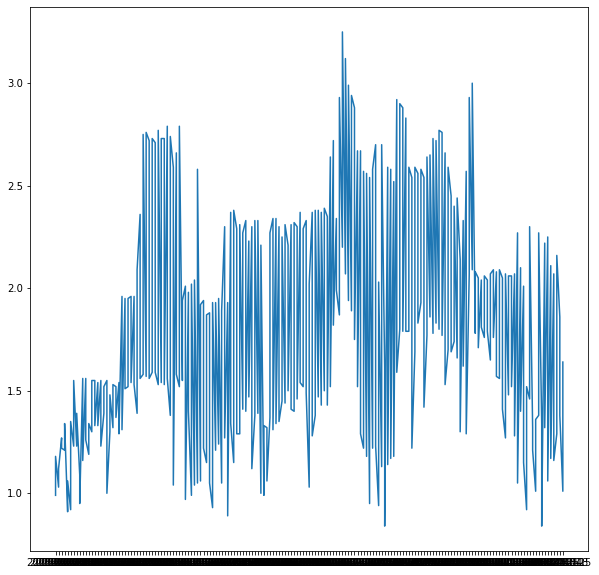

In [54]:
avocado_df_sample = avocado_df_sample.sort_values("Date")
plt.figure(figsize=(10,10))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [55]:
avocado_df_sample = avocado_df_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})
m = Prophet()
m.fit(avocado_df_sample)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


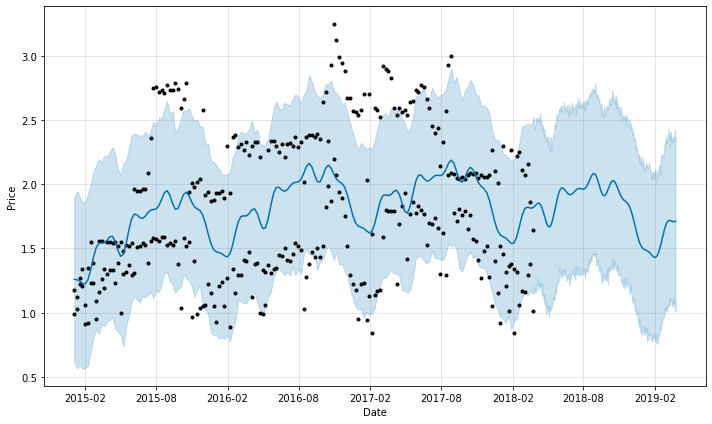

In [56]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')
#

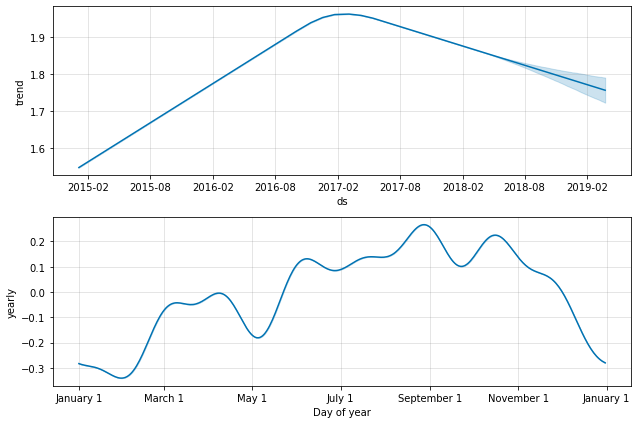

In [57]:
figure3 = m.plot_components(forecast)